# Basic imports

In [1]:
import os
#import pydub
#import sox
import pandas as pd
import numpy as np
import datetime
import librosa
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [2]:
REPO_DIR = "/mnt/c/Users/zobni/Programming/UWrMLProjectAudioSeg/"
AUDIO_TYPE = ".wav"
SECOND = 1000

In [148]:
os.chdir(REPO_DIR)
os.listdir(REPO_DIR + "/data")
for i in [1, 2, 3]:
    os.makedirs(REPO_DIR + "/data/audio{}".format(i), exist_ok=True)

# audio1 processing

In [149]:
audio = pydub.AudioSegment.from_wav(REPO_DIR + "data/audio1.wav")

In [150]:
new_audio = [audio[i * SECOND : (i + 1) * SECOND] for i in range(len(audio)//SECOND)]

In [151]:
for fragment in enumerate(new_audio):
    fragment[1].export("data/audio1/audio1_{}.wav".format(fragment[0] + 1), format="wav")

In [143]:
labels_df = pd.read_csv('data/labels1.txt')[['timestamp', 'label']]
labels_df['timestamp'] = labels_df['timestamp'].apply(lambda x: datetime.datetime.strptime(x, "%H:%M:%S"))
labels_df = labels_df.set_index('timestamp')
labels_df = labels_df.resample('1S').pad()
labels_df['seconds'] = labels_df.index
labels_df['seconds'] = labels_df['seconds'].apply(lambda x: int((x - datetime.datetime(1900, 1, 1)).total_seconds()))
labels_df.to_csv(REPO_DIR + '/data/labels1_long.csv', index=False)

In [179]:
rows = []
for second in tqdm(labels_df['seconds']):
    y, sr = librosa.load(REPO_DIR + "data/audio1/audio1_{}.wav".format(second))
    label = labels_df[labels_df['seconds'] == second]['label'][0]
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    rmse = np.mean(librosa.feature.rms(y=y))
    spec_cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    mfccs = []
    for e in mfcc:
        mfccs.append(np.mean(e))
    obs = [second, label, rmse, chroma_stft, spec_cent, spec_bw, rolloff, zcr]
    obs.extend(mfccs)
    rows.append(obs)

C:\Users\wojti\anaconda3\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
C:\Users\wojti\anaconda3\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
C:\Users\wojti\anaconda3\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
C:\Users\wojti\anaconda3\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
C:\Users\wojti\anaconda3\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tunin

In [181]:
columns = ['timestamp', 'label', 'chroma_stft', 'rmse', 'spec_cent', 'spec_bw', 'rolloff', 'zcr']
columns.extend(['mfcc_{}'.format(i) for i in range(len(mfcc))])
data = pd.DataFrame(rows, columns = columns)
data.head()
data.to_csv(REPO_DIR + "/data/data_1.csv")

# audio2 processing

In [182]:
audio = pydub.AudioSegment.from_wav(REPO_DIR + "data/audio2.wav")

In [183]:
new_audio = [audio[i * SECOND : (i + 1) * SECOND] for i in range(len(audio)//SECOND)]

In [188]:
for fragment in enumerate(new_audio):
    fragment[1].export("data/audio2/audio2_{}.wav".format(fragment[0] + 1), format="wav")

In [189]:
labels_df = pd.read_csv('data/labels2.txt')[['timestamp', 'label']]
labels_df['timestamp'] = labels_df['timestamp'].apply(lambda x: datetime.datetime.strptime(x, "%H:%M:%S"))
labels_df = labels_df.set_index('timestamp')
labels_df = labels_df.resample('1S').pad()
labels_df['seconds'] = labels_df.index
labels_df['seconds'] = labels_df['seconds'].apply(lambda x: int((x - datetime.datetime(1900, 1, 1)).total_seconds()))
labels_df.to_csv(REPO_DIR + '/data/labels2_long.csv', index=False)

In [190]:
rows = []
for second in tqdm(labels_df['seconds']):
    y, sr = librosa.load(REPO_DIR + "data/audio2/audio2_{}.wav".format(second))
    label = labels_df[labels_df['seconds'] == second]['label'][0]
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    rmse = np.mean(librosa.feature.rms(y=y))
    spec_cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    mfccs = []
    for e in mfcc:
        mfccs.append(np.mean(e))
    obs = [second, label, rmse, chroma_stft, spec_cent, spec_bw, rolloff, zcr]
    obs.extend(mfccs)
    rows.append(obs)

C:\Users\wojti\anaconda3\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


In [191]:
columns = ['timestamp', 'label', 'chroma_stft', 'rmse', 'spec_cent', 'spec_bw', 'rolloff', 'zcr']
columns.extend(['mfcc_{}'.format(i) for i in range(len(mfcc))])
data = pd.DataFrame(rows, columns = columns)
data.head()
data.to_csv(REPO_DIR + "/data/data_2.csv")

# audio3 processing

In [192]:
audio = pydub.AudioSegment.from_wav(REPO_DIR + "data/audio3.wav")

In [193]:
new_audio = [audio[i * SECOND : (i + 1) * SECOND] for i in range(len(audio)//SECOND)]

In [194]:
for fragment in enumerate(new_audio):
    fragment[1].export("data/audio3/audio3_{}.wav".format(fragment[0] + 1), format="wav")

In [195]:
labels_df = pd.read_csv('data/labels3.txt')[['timestamp', 'label']]
labels_df['timestamp'] = labels_df['timestamp'].apply(lambda x: datetime.datetime.strptime(x, "%H:%M:%S"))
labels_df = labels_df.set_index('timestamp')
labels_df = labels_df.resample('1S').pad()
labels_df['seconds'] = labels_df.index
labels_df['seconds'] = labels_df['seconds'].apply(lambda x: int((x - datetime.datetime(1900, 1, 1)).total_seconds()))
labels_df.to_csv(REPO_DIR + '/data/labels3_long.csv', index=False)

In [196]:
rows = []
for second in tqdm(labels_df['seconds']):
    y, sr = librosa.load(REPO_DIR + "data/audio3/audio3_{}.wav".format(second))
    label = labels_df[labels_df['seconds'] == second]['label'][0]
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    rmse = np.mean(librosa.feature.rms(y=y))
    spec_cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    mfccs = []
    for e in mfcc:
        mfccs.append(np.mean(e))
    obs = [second, label, rmse, chroma_stft, spec_cent, spec_bw, rolloff, zcr]
    obs.extend(mfccs)
    rows.append(obs)

C:\Users\wojti\anaconda3\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


In [197]:
columns = ['timestamp', 'label', 'chroma_stft', 'rmse', 'spec_cent', 'spec_bw', 'rolloff', 'zcr']
columns.extend(['mfcc_{}'.format(i) for i in range(len(mfcc))])
data = pd.DataFrame(rows, columns = columns)
data.head()
data.to_csv(REPO_DIR + "/data/data_3.csv")

# Learning models

In [3]:
data = pd.concat([pd.read_csv(REPO_DIR + "/data/data_{}.csv".format(i), index_col=False) for i in [1,2,3]])
data.drop('Unnamed: 0', axis=1, inplace=True)
data.drop('timestamp', axis=1, inplace=True)

In [4]:
data.head()

,label,chroma_stft,rmse,spec_cent,spec_bw,rolloff,zcr,mfcc_0,mfcc_1,mfcc_2,...,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19
0,music,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-1131.370972,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,music,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-1131.370972,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,music,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-1131.370972,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,music,0.012444,0.081449,432.529692,424.989395,949.418501,0.01466,-632.946411,12.773681,-1.715082,...,-2.038454,-0.884550,-1.802255,0.243648,-0.727257,0.287844,0.141726,-0.364878,-0.763656,-0.566740
4,music,0.172535,0.435161,2309.434221,2392.904163,4963.403320,0.10235,-33.924923,96.108818,-15.746825,...,-10.182379,-11.484722,-13.531470,-5.707917,-9.890487,-1.513985,-8.121307,-4.673933,-4.060278,-2.206214


In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn import tree

In [124]:
X = data.drop('label', axis=1)
y = data['label']
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

In [125]:
depths = np.arange(5,51,5)
trainAccuracies = []
trainBalancedAccuracies = []
trainMacroF1s = []
testAccuracies = []
testBalancedAccuracies = []
testMacroF1s = []
for depth in tqdm(depths) : 
    rfClf = RandomForestClassifier(max_depth=depth, random_state=0)
    rfClf.fit(trainX, trainY)
    trainPreds = rfClf.predict(trainX)
    testPreds = rfClf.predict(testX)
    trainAccuracies.append(accuracy_score(y_true=trainY, y_pred=trainPreds))
    trainBalancedAccuracies.append(balanced_accuracy_score(y_true=trainY, y_pred=trainPreds))
    trainMacroF1s.append(f1_score(y_true=trainY, y_pred=trainPreds, average='macro'))
    testAccuracies.append(accuracy_score(y_true=testY, y_pred=testPreds))
    testBalancedAccuracies.append(balanced_accuracy_score(y_true=testY, y_pred=testPreds))
    testMacroF1s.append(f1_score(y_true=testY, y_pred=testPreds, average='macro'))

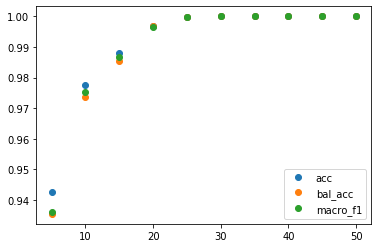

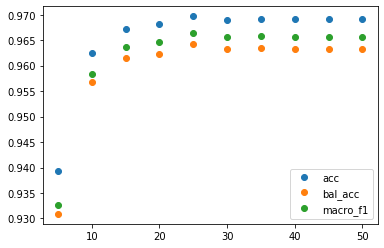

In [126]:
plt.plot(depths, trainAccuracies, 'o')
plt.plot(depths, trainBalancedAccuracies, 'o')
plt.plot(depths, trainMacroF1s, 'o')
plt.legend(['acc','bal_acc','macro_f1'])
plt.show()
plt.plot(depths, testAccuracies, 'o')
plt.plot(depths, testBalancedAccuracies, 'o')
plt.plot(depths, testMacroF1s, 'o')
plt.legend(['acc','bal_acc','macro_f1'])
plt.show()

In [127]:
testAccuracies

[0.9393939393939394,
 0.9625405344962541,
 0.9672369450967236,
 0.9682433187968243,
 0.9696969696969697,
 0.9690260538969026,
 0.9692496924969249,
 0.9691378731969138,
 0.9691378731969138,
 0.9691378731969138]

# Training HMM

In [135]:
from sklearn.preprocessing import LabelEncoder
from pomegranate import HiddenMarkovModel
from pomegranate.distributions import DiscreteDistribution
import pomegranate as pg

In [136]:
class smoothHMM:

    def __init__(self, model):

        self.predictor = model
        self.modelHMM = HiddenMarkovModel()

    def fit(self, X, y):
        
        le = LabelEncoder()
        X_simplified = le.fit_transform(self.predictor.predict(X)).reshape(1, -1)
        
        y = y.to_numpy().reshape(1, -1)

        self.modelHMM = self.modelHMM.from_samples(DiscreteDistribution, 2, X_simplified, labels = y,
                                   algorithm='labeled', state_names=['music', 'speech'], verbose = True)
        self.modelHMM.bake()
           

    def predict(self, X):

        le = LabelEncoder()
        X_simplified = le.fit_transform(self.predictor.predict(X)).tolist()
        
        return self.modelHMM.predict(X_simplified)
    
    def score(self, X, y):
        
        target = self.predict(X)
        
        le = LabelEncoder()
        y = le.fit_transform(y.to_numpy())
        
        return np.sum(target==y)/y.shape[0]

In [137]:
#trainX, testX, trainY, testY 
hmm = smoothHMM(rfClf)
hmm.fit(trainX, trainY)

[1] Improvement: 1018.9057852225033	Time (s): 0.01686
[2] Improvement: 0.0	Time (s): 0.0172
Total Training Improvement: 1018.9057852225033
Total Training Time (s): 0.0509


In [138]:
hmm.score(testX, testY)

0.6549256401654926